In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import IsolationForest


from data_utils import *
import xgboost as xgb


In [3]:
df = pd.read_csv('data/f_train.csv')
X = df.drop(["cent_price_cor", "cent_trans_cor"],axis=1)
y = df["cent_trans_cor"].values

In [4]:
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=1337, n_jobs=4, min_samples_leaf=2)

In [5]:
model.fit(X,y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200,
                      n_jobs=4, random_state=1337)

In [6]:
importances = model.feature_importances_
final_df = pd.DataFrame({'Features':X.columns, 'Importances':importances})

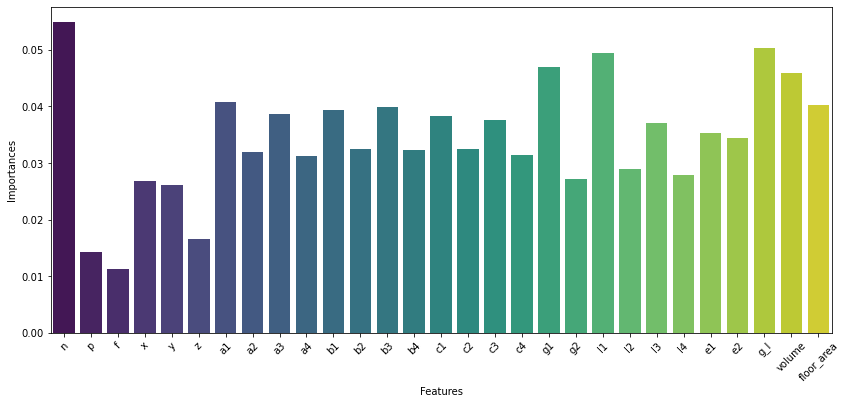

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=final_df, x='Features', y='Importances', palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [8]:
'''
estimator = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=1337, n_jobs=4, min_samples_leaf=2)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.ranking_
'''

'\nestimator = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=1337, n_jobs=4, min_samples_leaf=2)\nselector = RFECV(estimator, step=1, cv=5)\nselector = selector.fit(X, y)\nselector.ranking_\n'

In [9]:
out_detector = IsolationForest(contamination=0.01)
out_detector.fit(df)
isolated = pd.DataFrame(out_detector.predict(df), columns=['out'])
isolated[isolated.out == -1] = 0
df_filtered = df[isolated.out == 1]

In [10]:
df_filtered.to_csv('data/outlier_removed.csv', index=False)

In [11]:
df_filtered.describe()

,n,p,f,x,y,z,a1,a2,a3,a4,...,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor,g_l,volume,floor_area
count,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,...,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000
mean,0.498702,0.501523,0.501213,0.494877,0.496235,0.494839,0.501713,0.504141,0.497970,0.498223,...,0.502155,0.498947,0.501805,0.499618,0.500747,-0.202914,0.363223,0.275296,0.231654,0.370239
std,0.286536,0.305746,0.319095,0.302884,0.303333,0.318747,0.288881,0.288365,0.287769,0.290554,...,0.289439,0.286010,0.289300,0.288822,0.291257,0.116016,0.113893,0.201971,0.175029,0.217426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.613000,-0.399000,0.000000,0.000000,0.000000
25%,0.247778,0.250000,0.333333,0.250000,0.250000,0.222222,0.250000,0.250000,0.250000,0.250000,...,0.266667,0.250000,0.266667,0.241379,0.241379,-0.284000,0.294000,0.109417,0.093933,0.205000
50%,0.501111,0.500000,0.666667,0.500000,0.500000,0.444444,0.500000,0.500000,0.500000,0.500000,...,0.533333,0.500000,0.533333,0.482759,0.517241,-0.205000,0.372000,0.235926,0.191011,0.330000
75%,0.743611,0.750000,0.666667,0.750000,0.750000,0.777778,0.750000,0.750000,0.750000,0.750000,...,0.733333,0.740000,0.733333,0.758621,0.758621,-0.123000,0.443000,0.404003,0.325843,0.512500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.266000,0.674000,1.000000,1.000000,1.000000


In [12]:
df.describe()

,n,p,f,x,y,z,a1,a2,a3,a4,...,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor,g_l,volume,floor_area
count,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,...,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000
mean,0.498717,0.501717,0.500586,0.496478,0.498635,0.495347,0.502012,0.503271,0.497393,0.498719,...,0.501876,0.499281,0.501435,0.499287,0.500913,-0.202591,0.362586,0.275303,0.233360,0.372649
std,0.287047,0.306604,0.319796,0.303859,0.304477,0.319374,0.289162,0.288869,0.288482,0.290758,...,0.290103,0.286663,0.289653,0.289421,0.291461,0.116617,0.115221,0.202976,0.177876,0.219944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.613000,-0.399000,0.000000,0.000000,0.000000
25%,0.246667,0.250000,0.333333,0.250000,0.250000,0.222222,0.250000,0.250000,0.250000,0.250000,...,0.266667,0.250000,0.266667,0.241379,0.241379,-0.284000,0.294000,0.108857,0.093933,0.205000
50%,0.501111,0.500000,0.666667,0.500000,0.500000,0.444444,0.500000,0.500000,0.500000,0.500000,...,0.533333,0.500000,0.533333,0.482759,0.517241,-0.205000,0.372000,0.235626,0.191011,0.330000
75%,0.744444,0.750000,0.666667,0.750000,0.750000,0.777778,0.750000,0.750000,0.750000,0.750000,...,0.733333,0.750000,0.733333,0.758621,0.758621,-0.122000,0.443000,0.404713,0.327640,0.516250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.266000,0.717000,1.000000,1.000000,1.000000
